In [81]:
!pip install seaborn

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [88]:

!pip3 show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [44]:
data=pd.read_csv("company_data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [11]:
data.isna().sum().sum() ##no missing values

0

In [14]:
#duplicate values
data[data.duplicated()]


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [15]:
#null values
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [45]:
#converting categorical variable into numerical
#labelencoder
labelencoder=LabelEncoder()
data["Urban"]=labelencoder.fit_transform(data["Urban"])
data["US"]=labelencoder.fit_transform(data["US"])
#using map
data["ShelveLoc"]=data["ShelveLoc"].map({"Good":2,"Medium":1,"Bad":0})
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Advertising'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'ShelveLoc'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Urban'}>,
        <Axes: title={'center': 'US'}>, <Axes: >]], dtype=object)

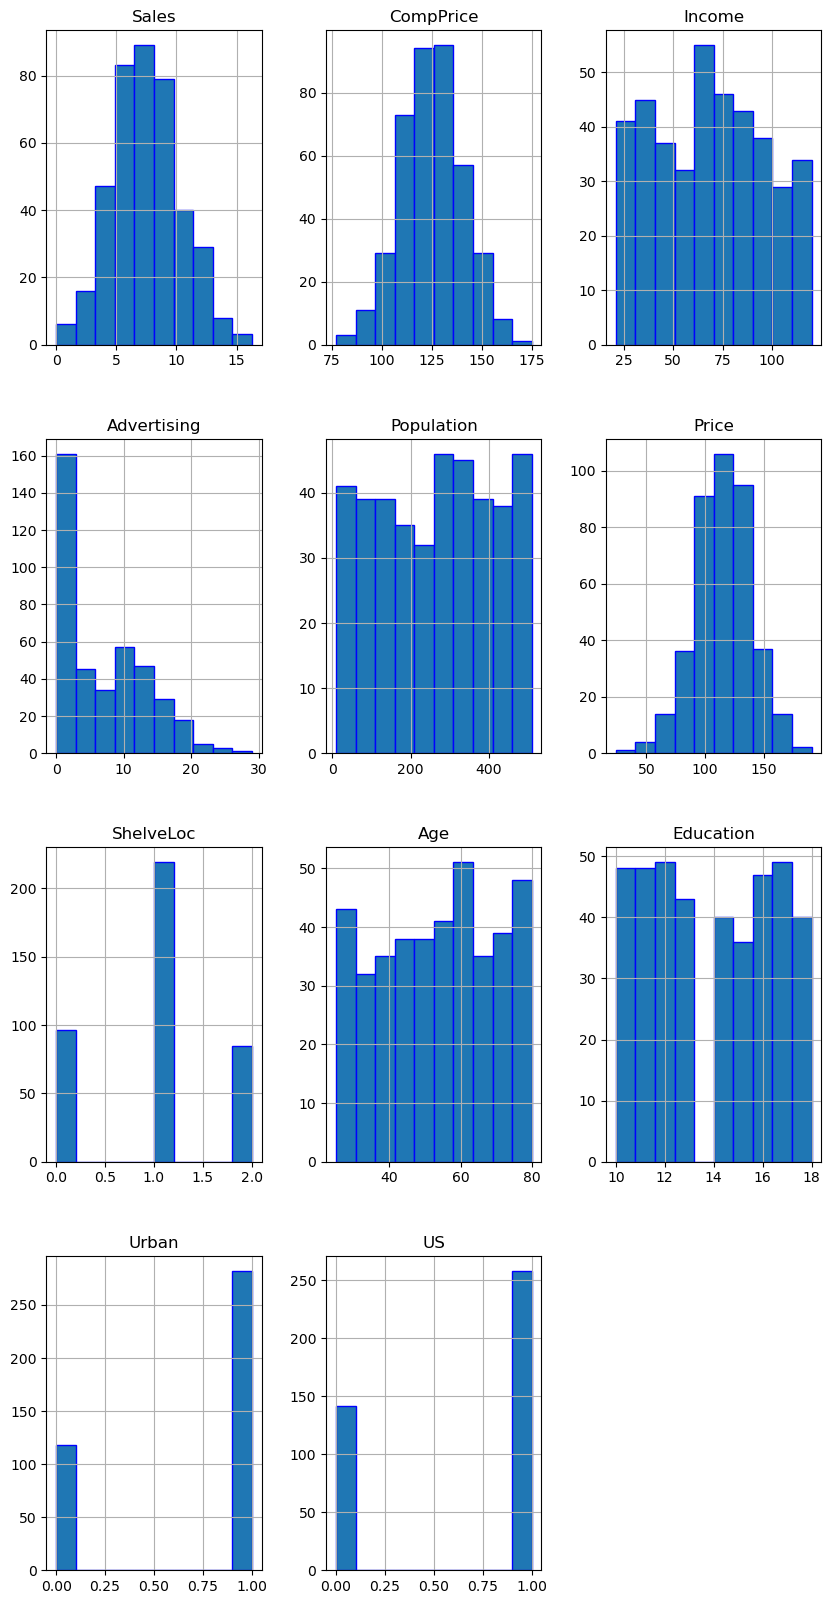

In [46]:
data.hist(edgecolor="blue",figsize=(10,20))

In [50]:
corr=data.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.554458,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.038549,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.053465,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.056552,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.020614,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.050924,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.554458,0.038549,-0.053465,0.056552,-0.020614,0.050924,1.000000,0.014149,-0.025723,-0.075404,0.047378
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.014149,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,-0.025723,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.075404,0.028479,-0.033094,1.000000,0.047085


<Axes: >

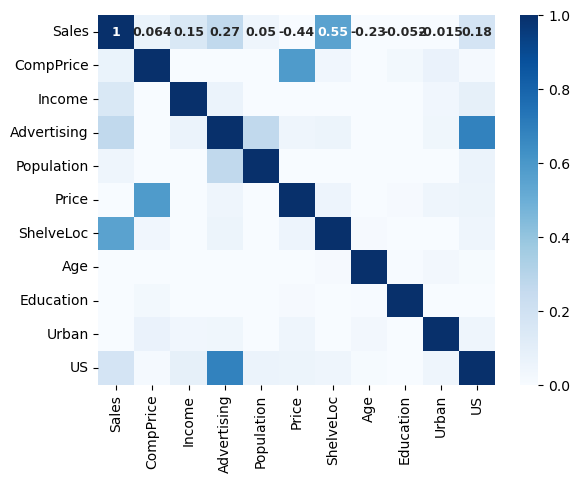

In [93]:
sns.heatmap(corr,annot=True,cmap="Blues",vmin=0,vmax=1,annot_kws={"fontsize":9,"fontweight":"bold"})

<Axes: xlabel='ShelveLoc', ylabel='count'>

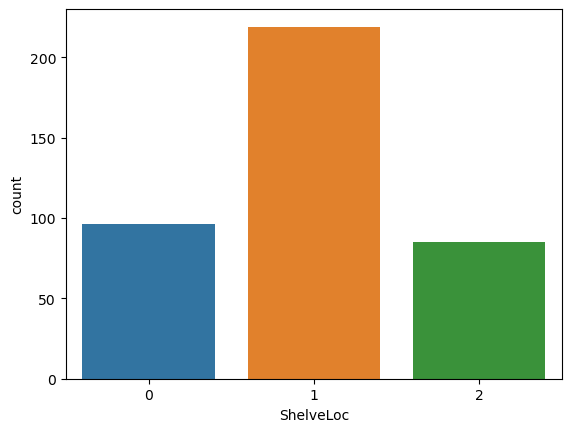

In [98]:
sns.countplot(x="ShelveLoc",data=data)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

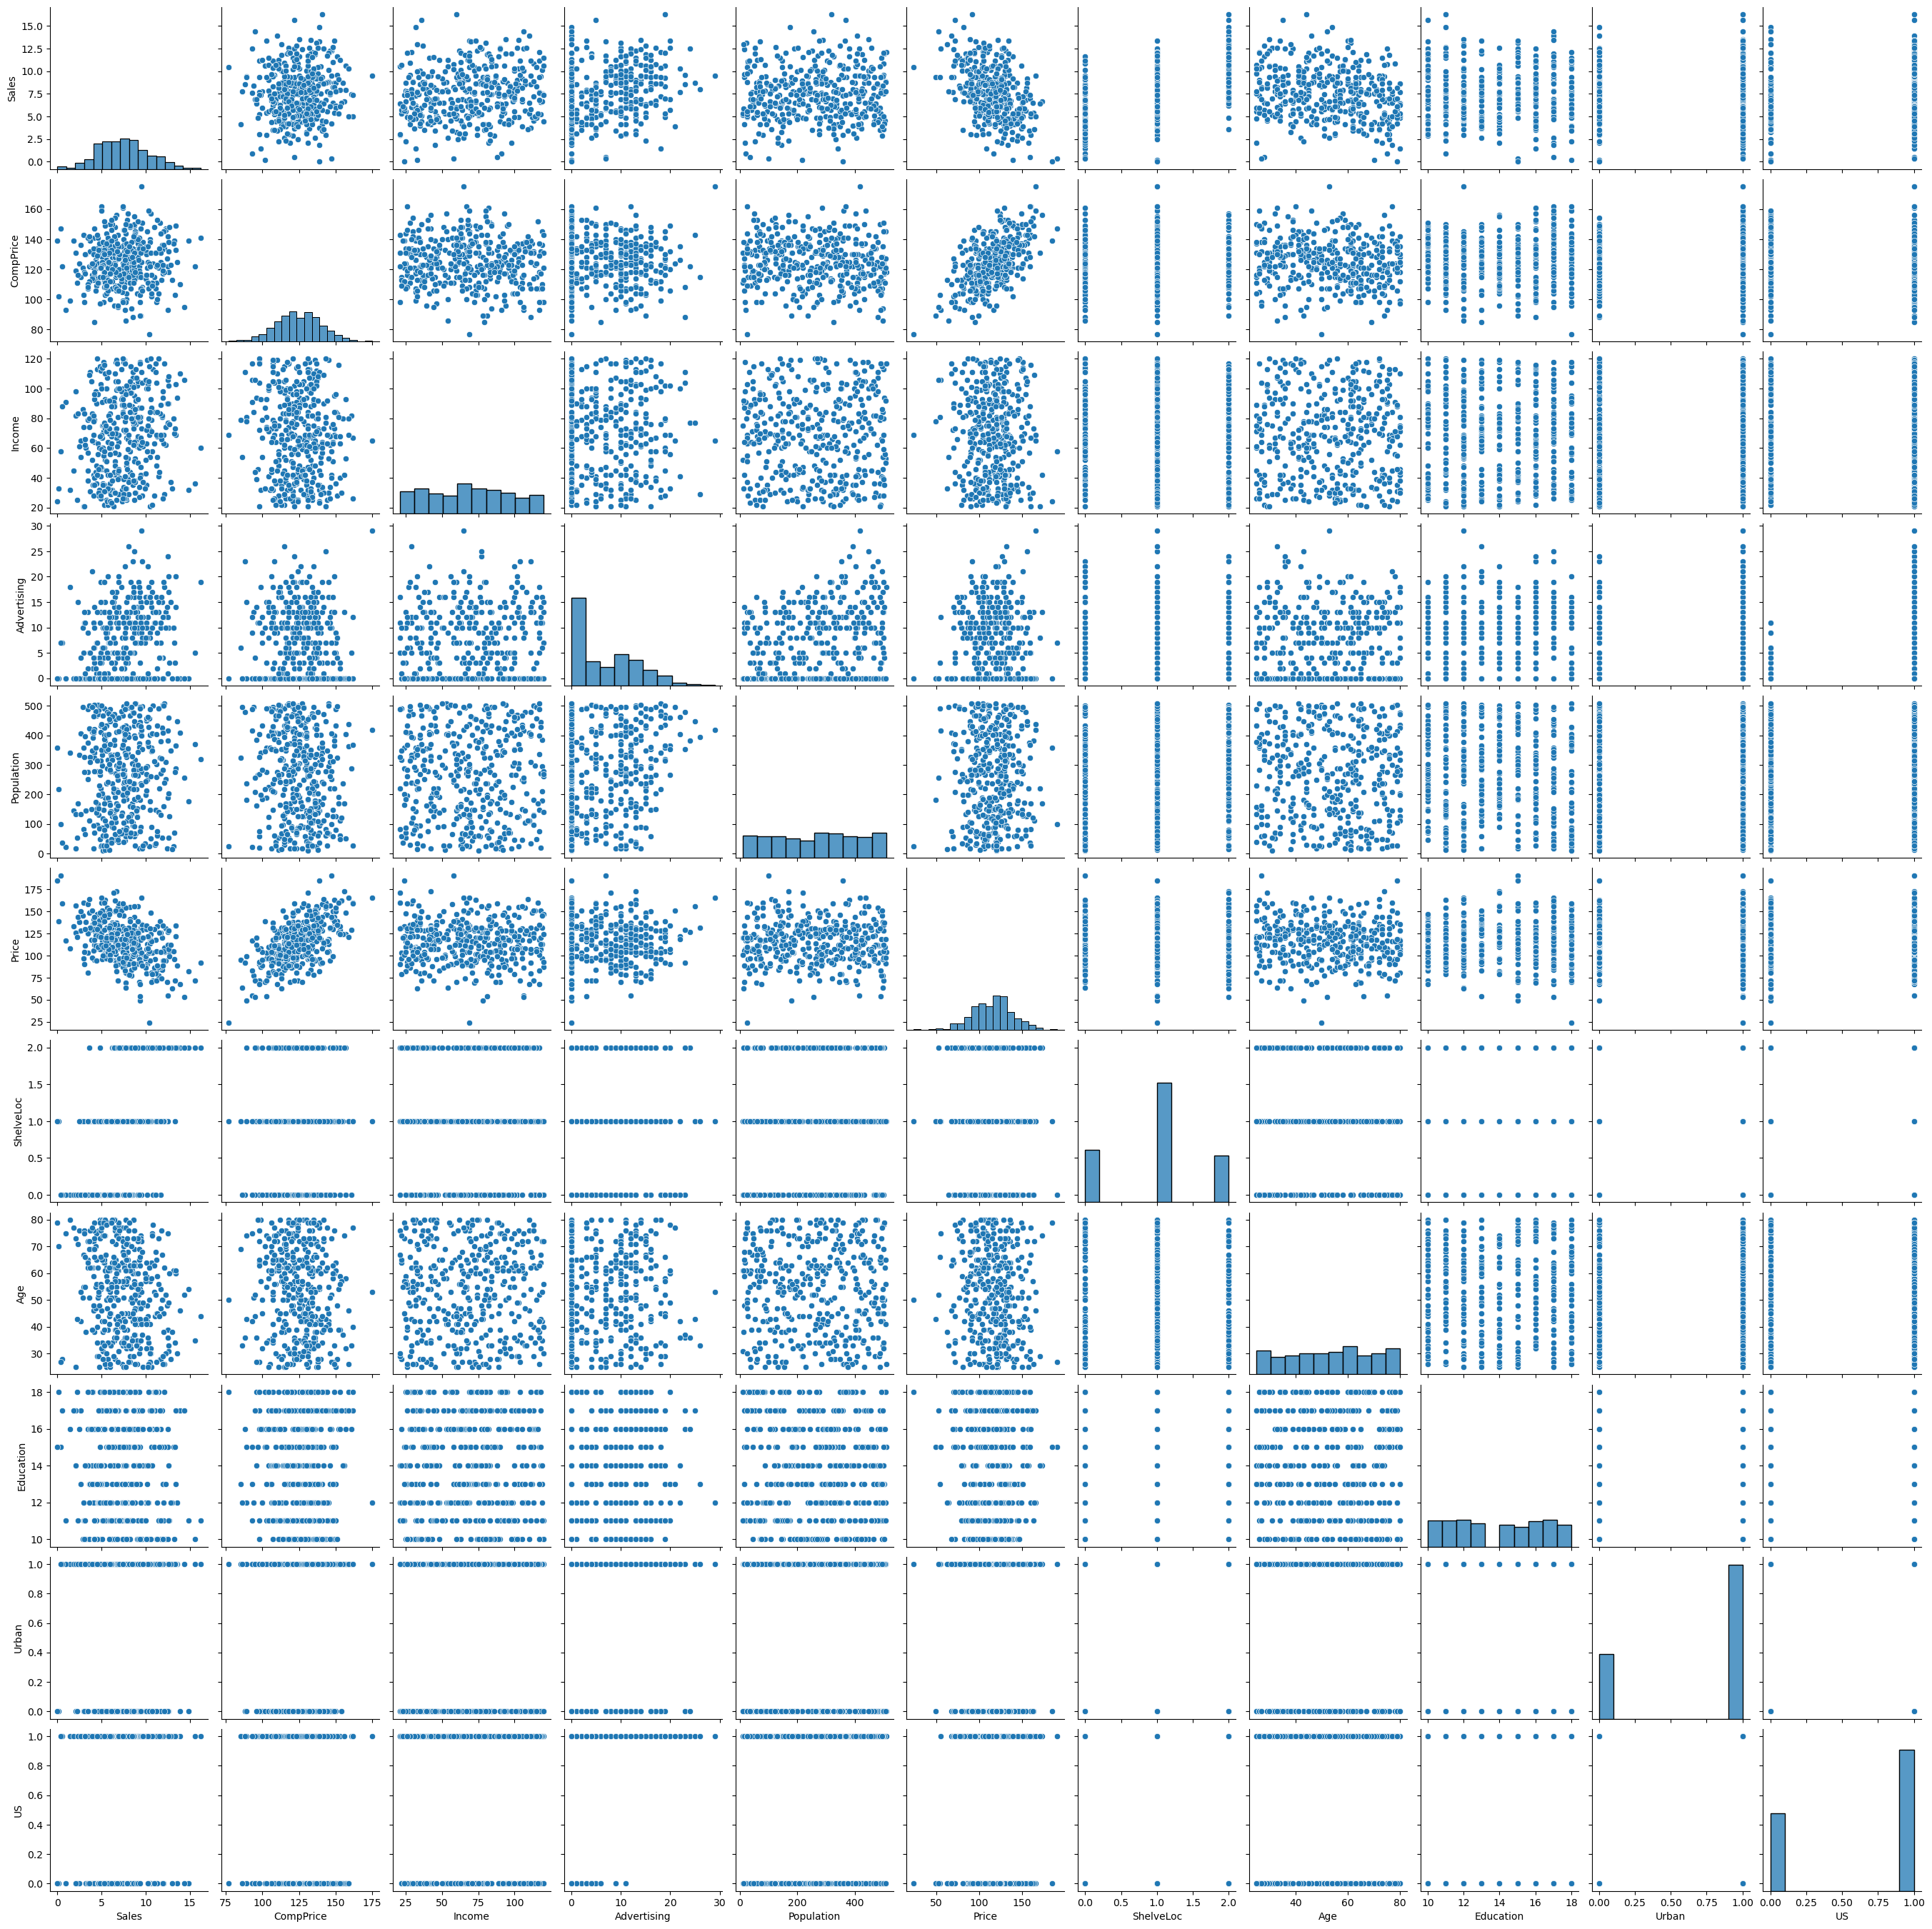

In [99]:
sns.pairplot(data)

<Axes: xlabel='Sales', ylabel='Price'>

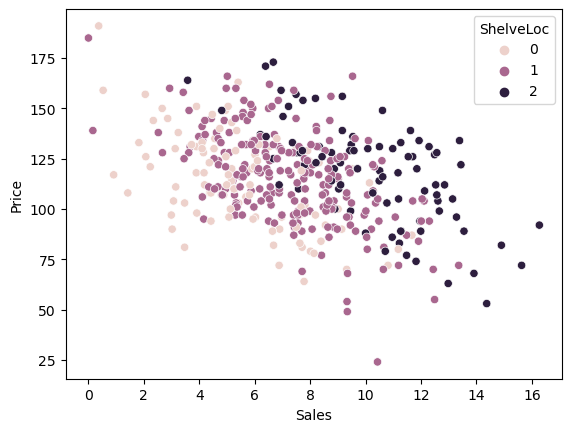

In [101]:
sns.scatterplot(x=data["Sales"],y=data["Price"],hue=data["ShelveLoc"])

In [124]:
x=data.iloc[:,0:6]
y=data["ShelveLoc"]

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=12)

In [138]:
# Decision tree 
model=DecisionTreeClassifier(max_depth=3)

In [139]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [140]:
y_pred=model.predict(x_test)

[Text(0.5769230769230769, 0.875, 'x[0] <= 10.495\ngini = 0.568\nsamples = 240\nvalue = [57, 141, 42]'),
 Text(0.3076923076923077, 0.625, 'x[0] <= 5.445\ngini = 0.505\nsamples = 203\nvalue = [54, 131, 18]'),
 Text(0.15384615384615385, 0.375, 'x[2] <= 53.5\ngini = 0.515\nsamples = 63\nvalue = [32, 30, 1]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.397\nsamples = 22\nvalue = [6, 16, 0]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.481\nsamples = 41\nvalue = [26, 14, 1]'),
 Text(0.46153846153846156, 0.375, 'x[5] <= 90.5\ngini = 0.44\nsamples = 140\nvalue = [22, 101, 17]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.56\nsamples = 15\nvalue = [7, 7, 1]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.404\nsamples = 125\nvalue = [15, 94, 16]'),
 Text(0.8461538461538461, 0.625, 'x[5] <= 108.5\ngini = 0.5\nsamples = 37\nvalue = [3, 10, 24]'),
 Text(0.7692307692307693, 0.375, 'x[2] <= 61.5\ngini = 0.601\nsamples = 24\nvalue = [3, 10, 11]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples

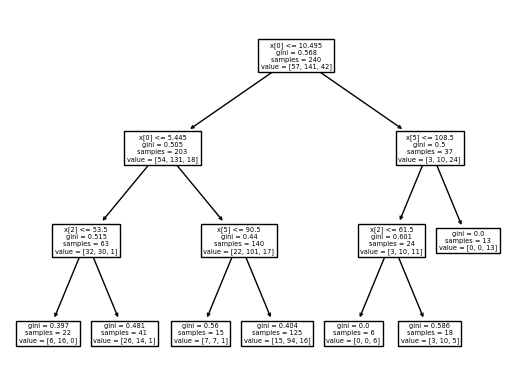

In [141]:
tree.plot_tree(model)

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

57.49999999999999

In [152]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.53      0.49      0.51        39\n           1       0.55      0.78      0.65        78\n           2       0.92      0.28      0.43        43\n\n    accuracy                           0.57       160\n   macro avg       0.67      0.52      0.53       160\nweighted avg       0.64      0.57      0.55       160\n'

In [154]:
import numpy as np
np.mean(y_test==y_pred)

0.575

In [159]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[19, 20,  0],
       [16, 61,  1],
       [ 1, 30, 12]], dtype=int64)

<Axes: >

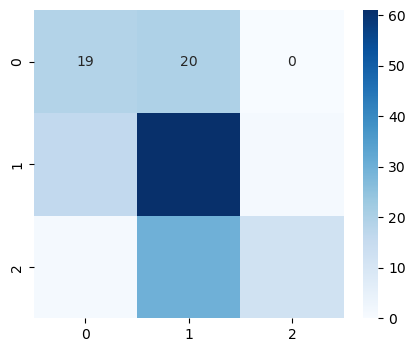

In [167]:
plt.figure(figsize=(5,4))
sns.heatmap(data=cm,annot=True,cmap="Blues")

In [188]:
#Desicion tree using Entrophy
model_e=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model_e.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [200]:
y_pred=model.predict(x_test)

[Text(0.5, 0.875, 'x[0] <= 6.165\nentropy = 1.383\nsamples = 240\nvalue = [57, 141, 42]'),
 Text(0.25, 0.625, 'x[2] <= 57.0\nentropy = 1.077\nsamples = 85\nvalue = [39, 45, 1]'),
 Text(0.125, 0.375, 'x[0] <= 5.995\nentropy = 0.811\nsamples = 36\nvalue = [9, 27, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.734\nsamples = 34\nvalue = [7, 27, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.375, 0.375, 'x[2] <= 68.5\nentropy = 1.079\nsamples = 49\nvalue = [30, 18, 1]'),
 Text(0.3125, 0.125, 'entropy = 0.906\nsamples = 15\nvalue = [12, 2, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.998\nsamples = 34\nvalue = [18, 16, 0]'),
 Text(0.75, 0.625, 'x[0] <= 10.495\nentropy = 1.296\nsamples = 155\nvalue = [18, 96, 41]'),
 Text(0.625, 0.375, 'x[5] <= 124.5\nentropy = 1.114\nsamples = 118\nvalue = [15, 86, 17]'),
 Text(0.5625, 0.125, 'entropy = 0.918\nsamples = 82\nvalue = [12, 65, 5]'),
 Text(0.6875, 0.125, 'entropy = 1.281\nsamples = 36\nvalue = [3, 21, 12]'),
 Text(0.87

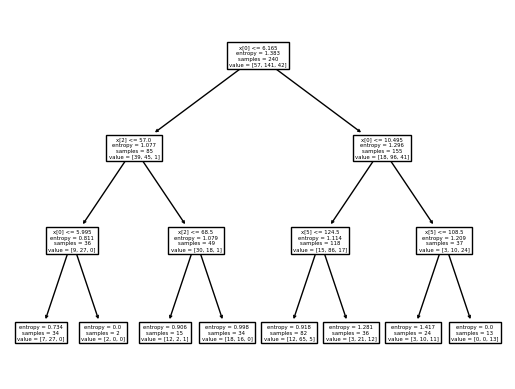

In [201]:
from sklearn import tree
tree.plot_tree(model_e)

In [204]:
np.mean(y_test==y_pred)

0.575

In [205]:
accuracy_score(y_test,y_pred)*100

57.49999999999999

<Axes: >

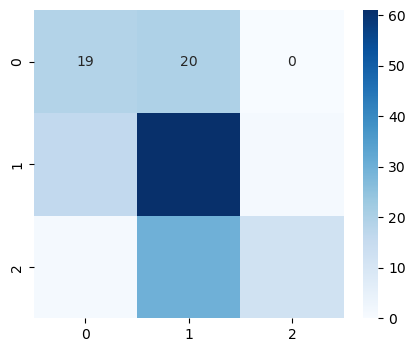

In [206]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(data=cm,annot=True,cmap="Blues")

In [207]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.53      0.49      0.51        39\n           1       0.55      0.78      0.65        78\n           2       0.92      0.28      0.43        43\n\n    accuracy                           0.57       160\n   macro avg       0.67      0.52      0.53       160\nweighted avg       0.64      0.57      0.55       160\n'

In [210]:
#DT using gini criteria 
model_g=DecisionTreeClassifier(criterion="gini",max_depth=3)
model_g.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [211]:
y_pred=model.predict(x_test)

[Text(0.5769230769230769, 0.875, 'x[0] <= 10.495\ngini = 0.568\nsamples = 240\nvalue = [57, 141, 42]'),
 Text(0.3076923076923077, 0.625, 'x[0] <= 5.445\ngini = 0.505\nsamples = 203\nvalue = [54, 131, 18]'),
 Text(0.15384615384615385, 0.375, 'x[2] <= 53.5\ngini = 0.515\nsamples = 63\nvalue = [32, 30, 1]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.397\nsamples = 22\nvalue = [6, 16, 0]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.481\nsamples = 41\nvalue = [26, 14, 1]'),
 Text(0.46153846153846156, 0.375, 'x[5] <= 90.5\ngini = 0.44\nsamples = 140\nvalue = [22, 101, 17]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.56\nsamples = 15\nvalue = [7, 7, 1]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.404\nsamples = 125\nvalue = [15, 94, 16]'),
 Text(0.8461538461538461, 0.625, 'x[5] <= 108.5\ngini = 0.5\nsamples = 37\nvalue = [3, 10, 24]'),
 Text(0.7692307692307693, 0.375, 'x[2] <= 61.5\ngini = 0.601\nsamples = 24\nvalue = [3, 10, 11]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples

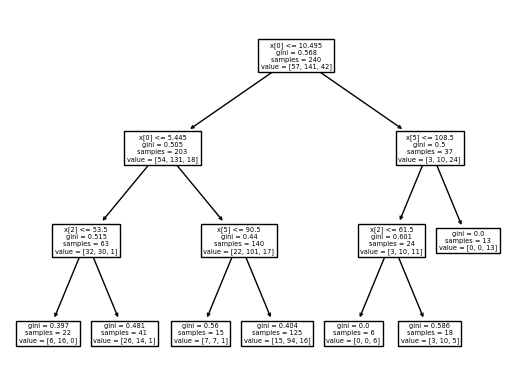

In [212]:
tree.plot_tree(model_g)

In [218]:
accuracy_score(y_pred,y_test)*100

57.49999999999999

In [219]:
np.mean(y_pred==y_test)

0.575

In [221]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.49      0.53      0.51        36\n           1       0.78      0.55      0.65       111\n           2       0.28      0.92      0.43        13\n\n    accuracy                           0.57       160\n   macro avg       0.52      0.67      0.53       160\nweighted avg       0.67      0.57      0.60       160\n'

In [227]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[19, 16,  1],
       [20, 61, 30],
       [ 0,  1, 12]], dtype=int64)

<Axes: >

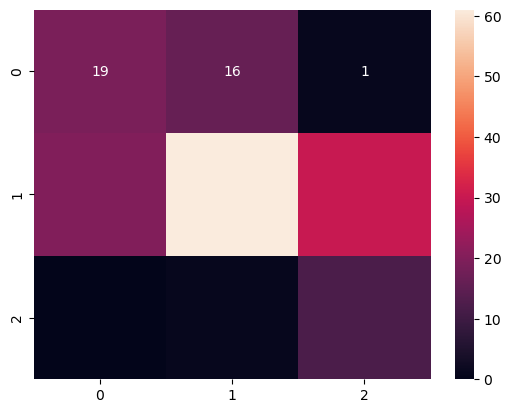

In [225]:
sns.heatmap(data=cm,annot=True)

In [229]:
#DT using Regression
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
DecisionTreeRegressor()
#Find the accuracy
model.score(x_test,y_test)

-0.18437118437118416